# Efficiency curves for the transformer net, S/B

Plots rejection vs TPR for the transformer trained on with a given S/B value. Also plots training metrics (ROC AUC, max(SIC), and FPR at TPR = 0.5) as a function of training epoch.

The notebook assumes that the transformer has been trained multiple times with different random seeds, and plots the best one ("best" = highest AUC).

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for calculating the auc from fpr, tpr
from matplotlib.backends.backend_pdf import PdfPages

from modules.post_processing import calc_auc_and_macSIC, calc_FPR_at_TPR


plt.style.use("science.mplstyle")


In [20]:
# change this to your working directory
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  

## Plot rejection vs TPR 

Iterate through the random seeds and pick the one with the best auc

In [5]:
# Load in the data

constit_num = 50

# dimension to plot
dim = 48
# list of random seeds trialed
seeds_list = [1,2,3,4,5]

# Num. S events scanned over
exp_id_S_nums = [0, 5, 50, 500, 2000, 5000, 10000, 20000, 30000, 50000]
exp_id_codes = ["0", "0p005", "0p05", "0p5", "02", "05", "10", "20", "30", "50"] 


lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}
nn_tpr_dict = {0:{},1:{},2:{}}
nn_fpr_dict = {0:{},1:{},2:{}}

# Storing the best AUC
lct_best_auc_dict = {0:{x:0 for x in exp_id_codes},1:{x:0 for x in exp_id_codes},2:{x:0 for x in exp_id_codes}}
nn_best_auc_dict = {0:{x:0 for x in exp_id_codes},1:{x:0 for x in exp_id_codes},2:{x:0 for x in exp_id_codes}}
trans_BC_best_auc_dict = {dim:0}
lct_const_rep_best_auc_dict = {dim:0}
nn_const_rep_best_auc_dict = {dim:0}

             
for seed in seeds_list:

    exp_id_t = "dim_"+str(dim)+"_seed_"+str(seed)

    expt_dir_trans_BC =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/" + exp_id_t + "/"
    expt_dir_CR =  base_dir + "projects/rep_learning/experiments/dim_scan_22_02_19/const_rep_seed_"+str(seed)+"/"

    """
    Event space representations
    """
    
    # LCT
    
    local_tpr = np.load( expt_dir_CR+"const_rep_lct_tpr_"+str(2*constit_num)+".npy" )
    local_fpr = np.load( expt_dir_CR+"const_rep_lct_fpr_"+str(2*constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)

    if local_auc >= lct_const_rep_best_auc_dict[dim]:
        lct_const_rep_best_auc_dict[dim] = local_auc
        lct_const_rep_tpr_dict[dim] = local_tpr
        lct_const_rep_fpr_dict[dim] = local_fpr
        
    # FCN

    local_tpr = np.load( expt_dir_CR+"const_rep_nn_tpr_"+str(2*constit_num)+".npy" )
    local_fpr = np.load( expt_dir_CR+"const_rep_nn_fpr_"+str(2*constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)

    if local_auc >= nn_const_rep_best_auc_dict[dim]:
        nn_const_rep_best_auc_dict[dim] = local_auc
        nn_const_rep_tpr_dict[dim] = local_tpr
        nn_const_rep_fpr_dict[dim] = local_fpr

    """
    Trans+BC
    """
    
    local_tpr = np.load( expt_dir_trans_BC+"trans_BC_tpr_"+str(constit_num)+".npy" )
    local_fpr = np.load( expt_dir_trans_BC+"trans_BC_fpr_"+str(constit_num)+".npy" )
    local_auc = metrics.auc(local_fpr, local_tpr)


    if local_auc >= trans_BC_best_auc_dict[dim]:

        trans_BC_best_auc_dict[dim] = local_auc
        trans_BC_tpr_dict[dim] = local_tpr
        trans_BC_fpr_dict[dim] = local_fpr


for code in exp_id_codes:
              
    for seed in seeds_list:

        exp_id = code+"kS_50kB_"+"dim_"+str(dim)+"_seed_"+str(seed)
        exp_id_t = "dim_"+str(dim)+"_seed_"+str(seed)

        print("Reading in experiment", exp_id, "...")

        expt_dir = base_dir + "projects/rep_learning/experiments/SB_ratios_22_04_10/" + exp_id + "/"

        """
        CLR transformer
        """
        
        # LCT
        
        for i in range(3):
            
            local_tpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_LCT"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)

            if local_auc >= lct_best_auc_dict[i][code]:
                lct_best_auc_dict[i][code] = local_auc
                lct_tpr_dict[i][code] = local_tpr
                lct_fpr_dict[i][code] = local_fpr


        # FCN
        
        for i in range(3):
            local_tpr = np.load( expt_dir+"CLR_NN"+str(i)+"_tpr_"+str(constit_num)+".npy" )
            local_fpr = np.load( expt_dir+"CLR_NN"+str(i)+"_fpr_"+str(constit_num)+".npy" )
            local_auc = metrics.auc(local_fpr, local_tpr)
            

            if local_auc >= nn_best_auc_dict[i][code]:
                nn_best_auc_dict[i][code] = local_auc
                nn_tpr_dict[i][code] = local_tpr
                nn_fpr_dict[i][code] = local_fpr

print("Done!")


Reading in experiment 0kS_50kB_dim_48_seed_1 ...
Reading in experiment 0kS_50kB_dim_48_seed_2 ...
Reading in experiment 0kS_50kB_dim_48_seed_3 ...
Reading in experiment 0kS_50kB_dim_48_seed_4 ...
Reading in experiment 0kS_50kB_dim_48_seed_5 ...
Reading in experiment 0p005kS_50kB_dim_48_seed_1 ...
Reading in experiment 0p005kS_50kB_dim_48_seed_2 ...
Reading in experiment 0p005kS_50kB_dim_48_seed_3 ...
Reading in experiment 0p005kS_50kB_dim_48_seed_4 ...
Reading in experiment 0p005kS_50kB_dim_48_seed_5 ...
Reading in experiment 0p05kS_50kB_dim_48_seed_1 ...
Reading in experiment 0p05kS_50kB_dim_48_seed_2 ...
Reading in experiment 0p05kS_50kB_dim_48_seed_3 ...
Reading in experiment 0p05kS_50kB_dim_48_seed_4 ...
Reading in experiment 0p05kS_50kB_dim_48_seed_5 ...
Reading in experiment 0p5kS_50kB_dim_48_seed_1 ...
Reading in experiment 0p5kS_50kB_dim_48_seed_2 ...
Reading in experiment 0p5kS_50kB_dim_48_seed_3 ...
Reading in experiment 0p5kS_50kB_dim_48_seed_4 ...
Reading in experiment 0p5k

For the best AUC curve, also calculate the max(SIC) and FPR at a TPR of 0.5

In [7]:
exp_id_SB_ratios = [float(x)/float(x+50000) for x in exp_id_S_nums]


lct_auc_dict = {0:[],1:[],2:[]}
nn_auc_dict = {0:[],1:[],2:[]}
lct_maxsic_dict = {0:[],1:[],2:[]}
nn_maxsic_dict = {0:[],1:[],2:[]}
trans_BC_auc = []
trans_BC_maxsic = []
nn_const_rep_auc = []
nn_const_rep_maxsic = []

lct_FPRatTPR_dict = {0:[],1:[],2:[]}
nn_FPRatTPR_dict = {0:[],1:[],2:[]}
trans_BC_FPRatTPR = []
nn_const_rep_FPRatTPR = []


for code in exp_id_codes:
    
    exp_id = code
   
    # Transformer BC 
    
    auc, maxSIC = calc_auc_and_macSIC(trans_BC_fpr_dict[dim], trans_BC_tpr_dict[dim])
    trans_BC_auc.append(auc)
    trans_BC_maxsic.append(maxSIC)
    fpr_at_tpr = calc_FPR_at_TPR(trans_BC_fpr_dict[dim], trans_BC_tpr_dict[dim])
    trans_BC_FPRatTPR.append(fpr_at_tpr)
    
    # NN Const Rep
 
    auc, maxSIC = calc_auc_and_macSIC(nn_const_rep_fpr_dict[dim], nn_const_rep_tpr_dict[dim])
    nn_const_rep_auc.append(auc)
    nn_const_rep_maxsic.append(maxSIC)
    fpr_at_tpr = calc_FPR_at_TPR(nn_const_rep_fpr_dict[dim], nn_const_rep_tpr_dict[dim])
    nn_const_rep_FPRatTPR.append(fpr_at_tpr)
    
    
    for i in range(3):
    
        # CLR trained LCT
        
        auc, maxSIC = calc_auc_and_macSIC(lct_fpr_dict[i][exp_id], lct_tpr_dict[i][exp_id])
        lct_auc_dict[i].append(auc)
        lct_maxsic_dict[i].append(maxSIC)
        fpr_at_tpr = calc_FPR_at_TPR(lct_fpr_dict[i][exp_id], lct_tpr_dict[i][exp_id])
        lct_FPRatTPR_dict[i].append(fpr_at_tpr)
        
        # CLR trained NN
        
        auc, maxSIC = calc_auc_and_macSIC(nn_fpr_dict[i][exp_id], nn_tpr_dict[i][exp_id])
        nn_auc_dict[i].append(auc)
        nn_maxsic_dict[i].append(maxSIC)
        fpr_at_tpr = calc_FPR_at_TPR(nn_fpr_dict[i][exp_id], nn_tpr_dict[i][exp_id])
        nn_FPRatTPR_dict[i].append(fpr_at_tpr)
        
        

### Plot the rejection curves

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/l

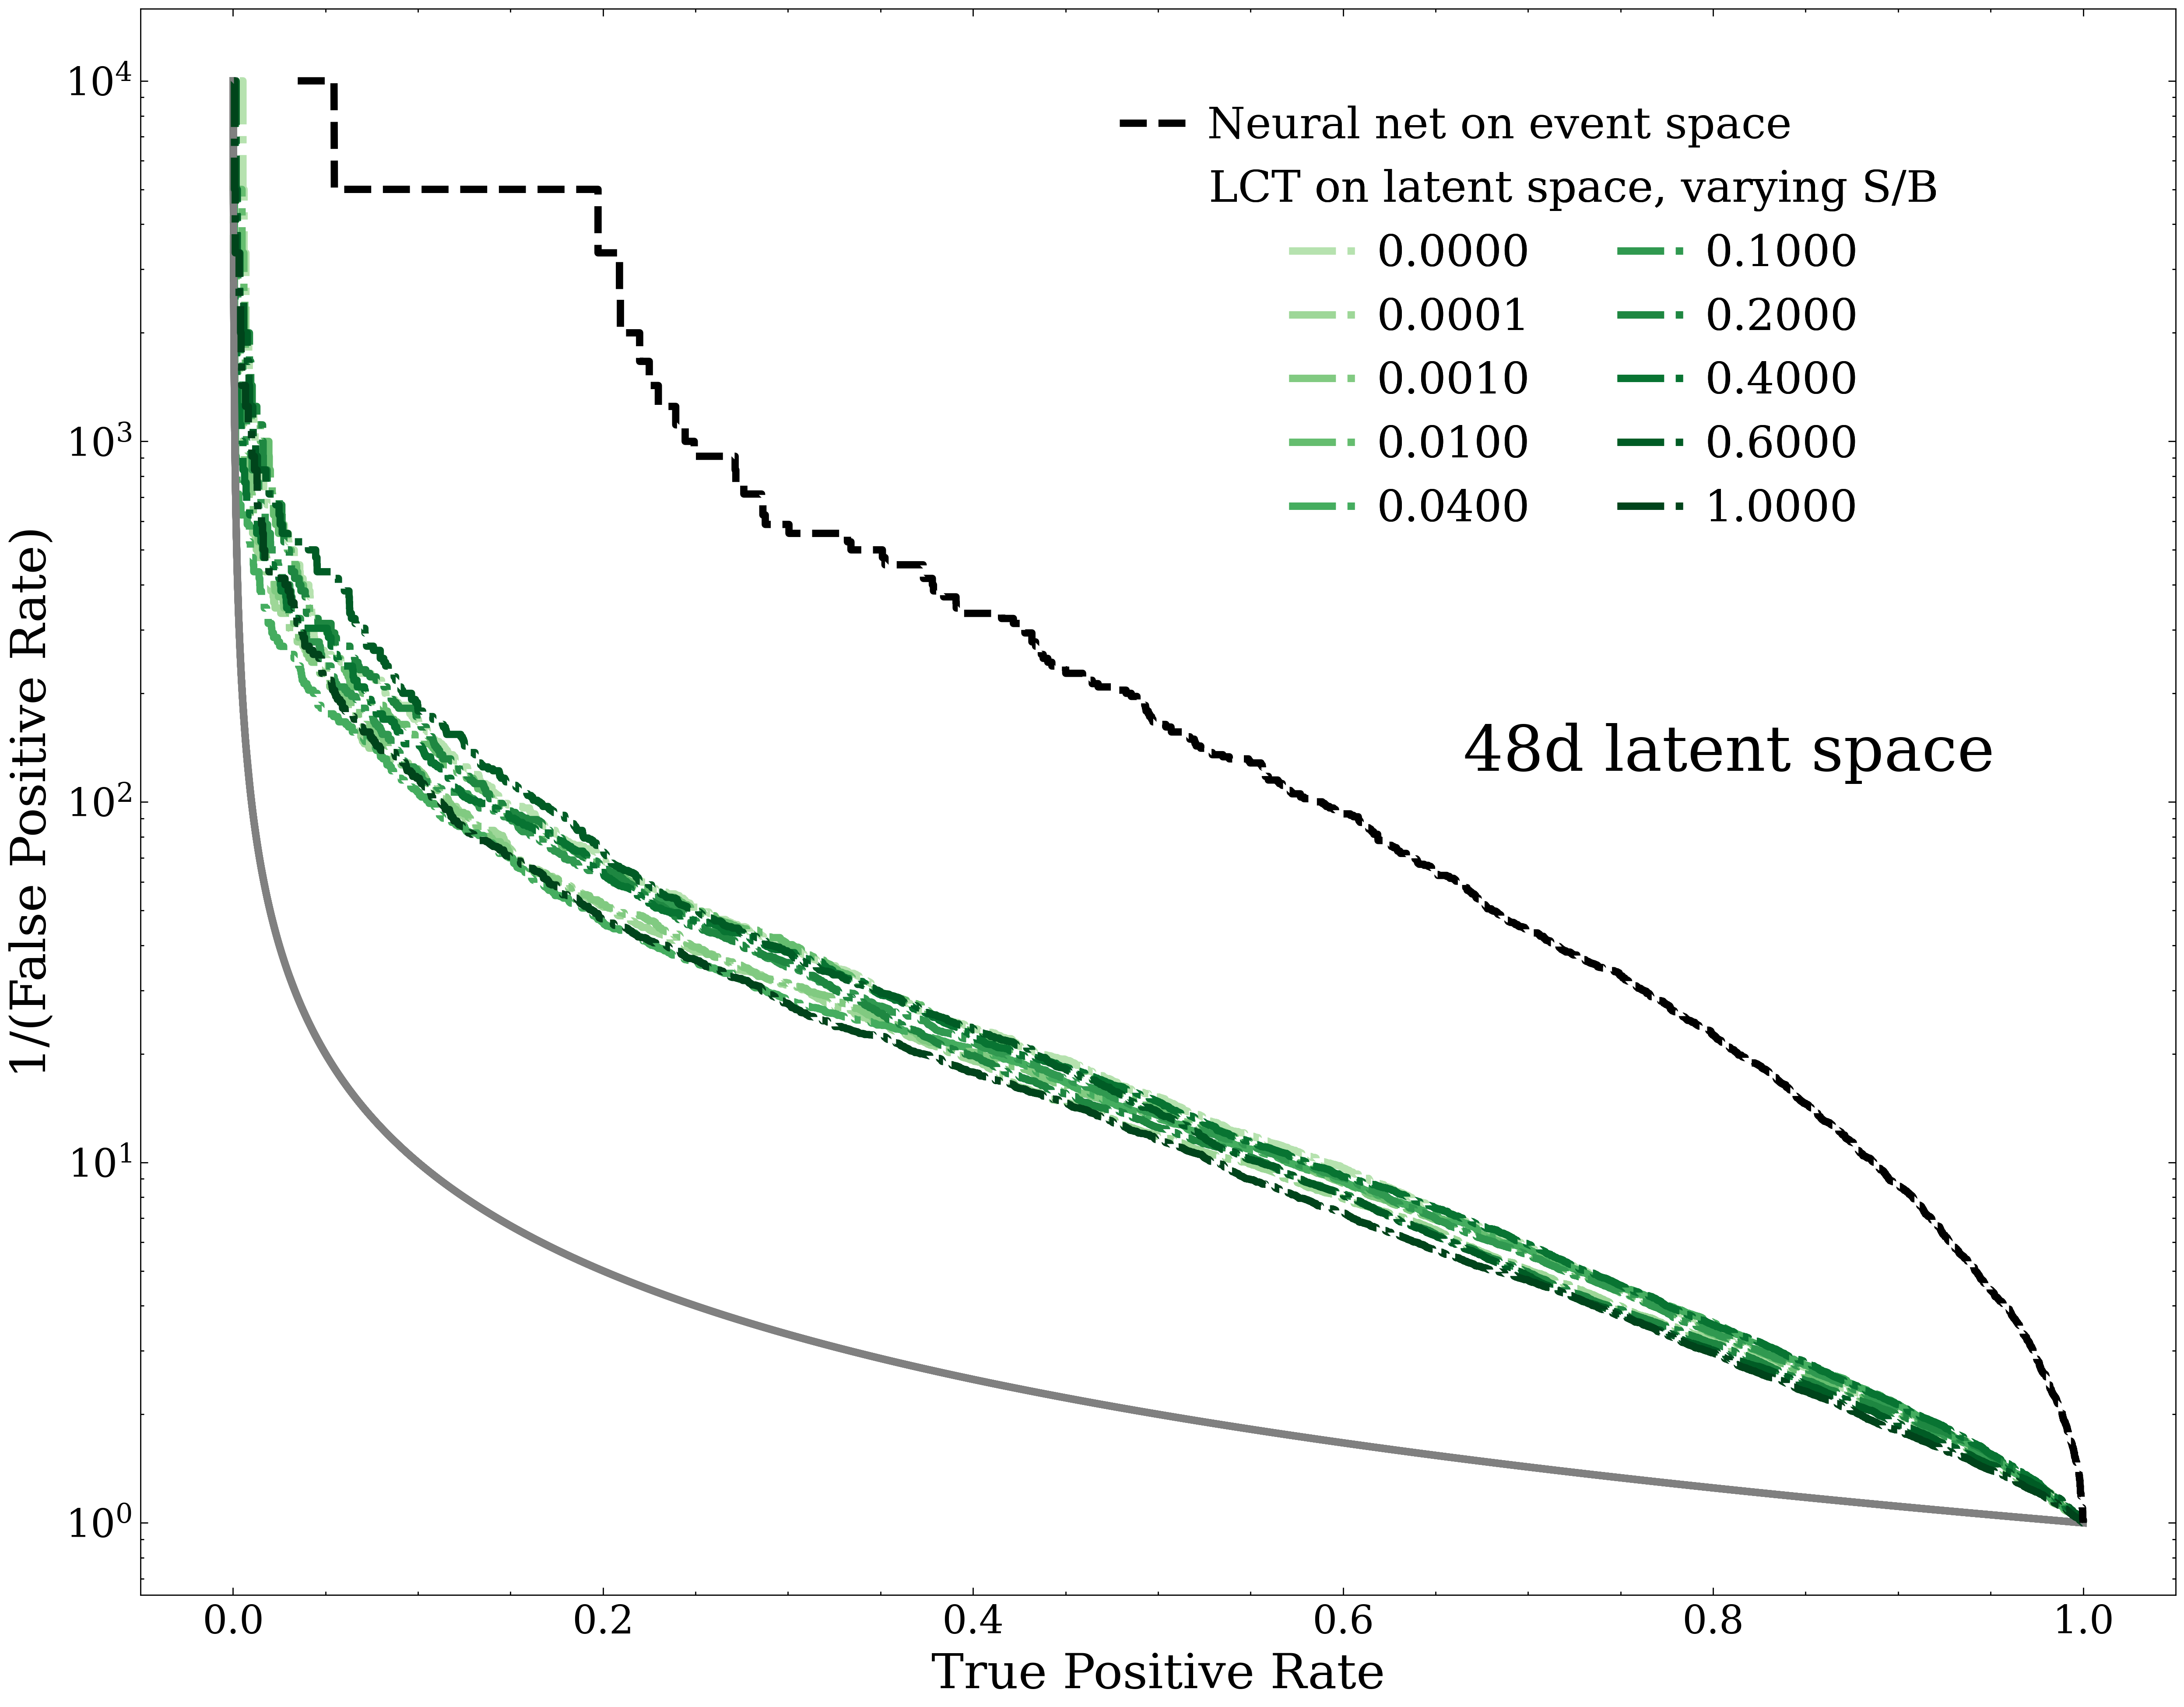

In [9]:
fig = plt.figure(figsize = (15,12))


l = 3
layer = 1
layer_id_dict = {0:"transformer layer", 1:"hidden layer", 2:"output layer"}
exp_id_dict = {"0":"0.0000", "0p005":"0.0001", "0p05":"0.0010", "0p5":"0.0100", "02":"0.0400","05":"0.1000", "10":"0.2000","20":"0.4000","30":"0.6000", "50":"1.0000"} 


title_fontsize = 18
gap = 4

from matplotlib.pyplot import cm
color = iter(cm.Greens(np.linspace(0, 1, 10+gap)))
for i in range(gap):
    c = next(color)
ax = plt.gca()


for i, exp_id in enumerate(exp_id_codes): 
    
    c = next(color)

    # ALL DIMS
    #"""
    # random
    plt.plot(lct_tpr_dict[2][exp_id],1.0/lct_tpr_dict[2][exp_id], color = "grey", linewidth = l)

    #plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT on const. rep", color = "black", linestyle = "dotted",  linewidth = l)
    #plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN on const. rep", color = "black", linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[layer][exp_id], 1.0/lct_fpr_dict[layer][exp_id], label = exp_id_dict[exp_id], color = c, linestyle = "dashdot",  linewidth = l)
    #plt.plot(nn_tpr_dict[layer][exp_id], 1.0/nn_fpr_dict[layer][exp_id], label = exp_id_dict[exp_id], color = c, linestyle = "solid",  linewidth = l)
    #"""
    
    # ONE DIM
    """
    plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[0], linestyle = "dotted",  linewidth = l)
    plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[1], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[2], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[3], linestyle = (0,(8,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[4], linestyle = "dashdot",  linewidth = l)
    """
    
plt.plot(nn_const_rep_tpr_dict[dim], 1.0/nn_const_rep_fpr_dict[dim], label = "Neural net on event space", color = "black", linestyle = "dashed" , linewidth = l)

#plt.plot(trans_BC_tpr_dict[dim], 1.0/trans_BC_fpr_dict[dim], label = "S/B = 1", color = "k", linestyle = "dashdot",  linewidth = l)
plt.text(0.65, 0.55, str(dim)+"d latent space", transform=ax.transAxes, fontsize=26,
        verticalalignment="top")
    
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")

# legend fun
handles, labels = plt.gca().get_legend_handles_labels()
handles_sb = handles[:-1]
labels_sb = labels[:-1]


plt.rcParams['legend.title_fontsize'] = title_fontsize


leg2 = plt.legend(handles=handles[-1:], 
           labels=labels[-1:], bbox_to_anchor=(.82, 0.95),  
                   ncol=1, handlelength=1.6, handletextpad=0.4,  
                   loc="upper right", frameon=False, borderaxespad=0, fontsize = title_fontsize)

leg1 = plt.legend(handles=handles_sb, labels=labels_sb, 
                  #title="Neural net on latent space, varying S/B", bbox_to_anchor=(0.964, 0.91), 
                  title="LCT on latent space, varying S/B", bbox_to_anchor=(0.892, 0.91), 
                  ncol=2
                  , handlelength=1.6, handletextpad=0.4, loc="upper right",
                  frameon=False, borderaxespad=0, fontsize = title_fontsize)
ax.add_artist(leg1)
ax.add_artist(leg2)



plt.show()


img_name = "figures/SvB_48_LCT.pdf"
pp = PdfPages(img_name)
pp.savefig(fig)
pp.close()




### Plot the SIC curves

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/p

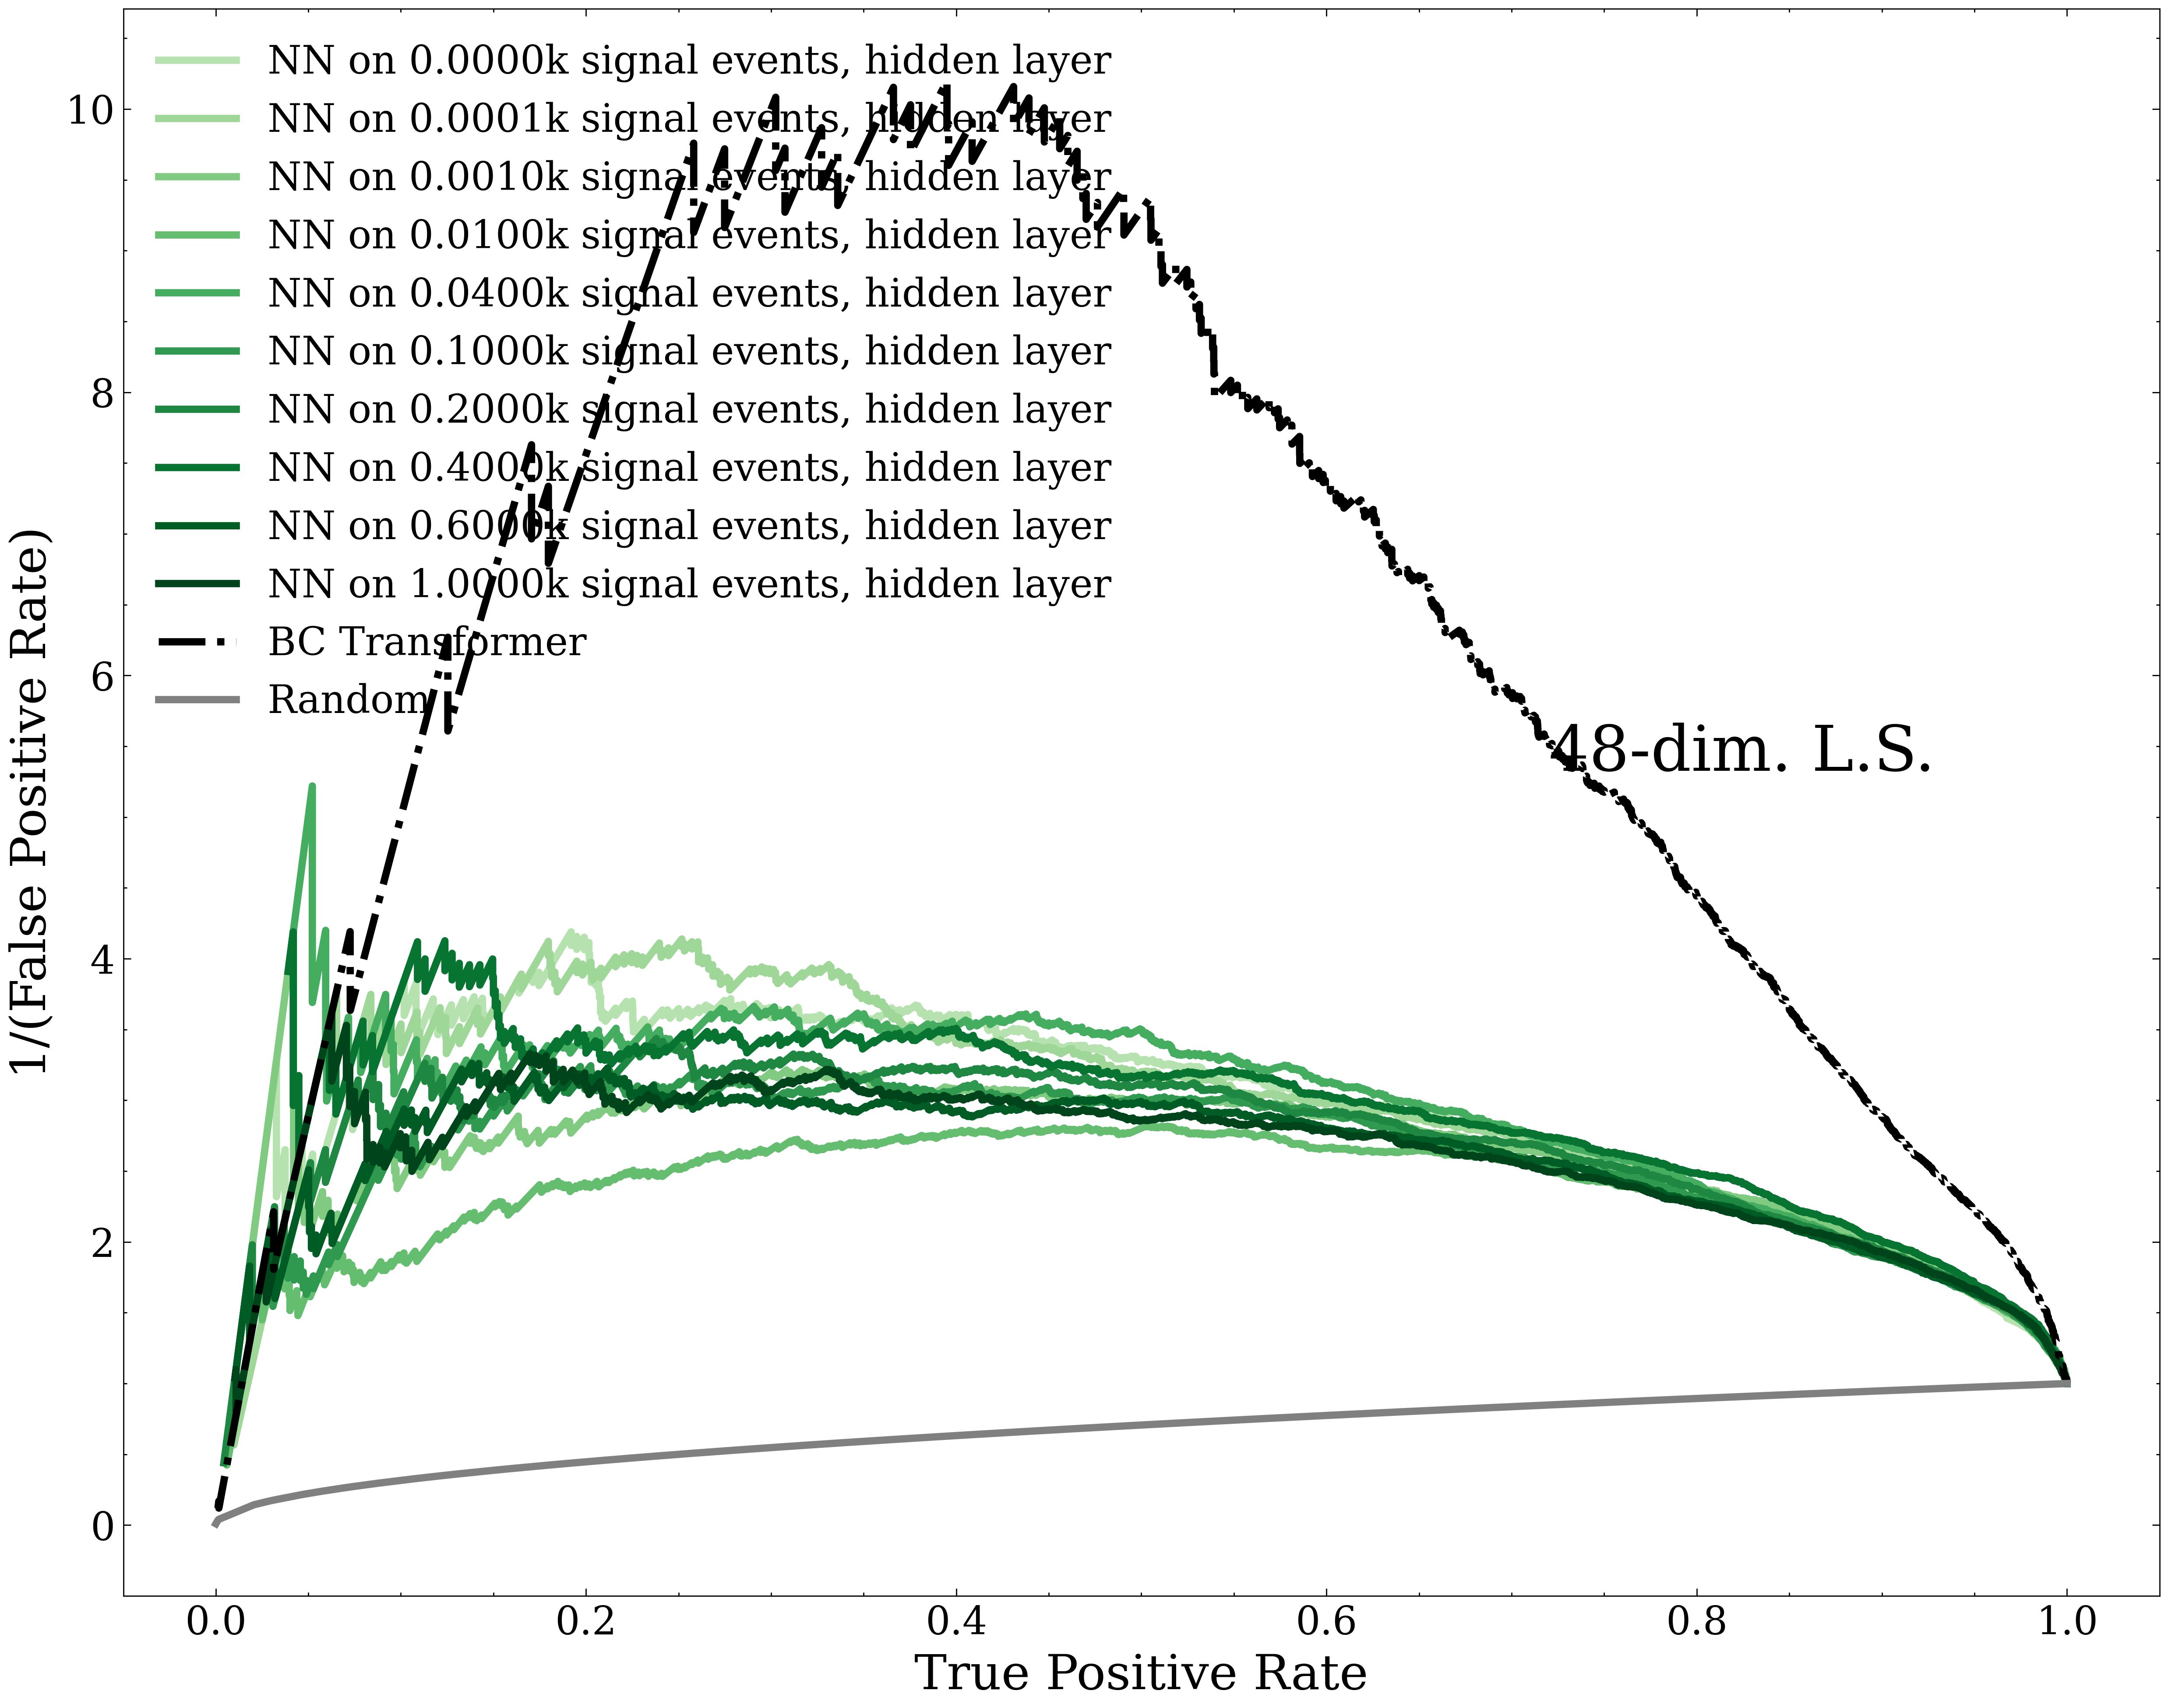

In [12]:
fig = plt.figure(figsize = (15,12))


l = 3
layer = 1
layer_id_dict = {0:"transformer layer", 1:"hidden layer", 2:"output layer"}
exp_id_dict = {"0":"0.0000", "0p005":"0.0001", "0p05":"0.0010", "0p5":"0.0100", "02":"0.0400","05":"0.1000", "10":"0.2000","20":"0.4000","30":"0.6000", "50":"1.0000"} 


title_fontsize = 18
gap = 4

from matplotlib.pyplot import cm
color = iter(cm.Greens(np.linspace(0, 1, 10+gap)))
for i in range(gap):
    c = next(color)
ax = plt.gca()


with np.errstate(divide='ignore'):

    for i, exp_id in enumerate(exp_id_codes): 
        
        c = next(color)

        #plt.plot(nn_tpr_dict[1][exp_id], nn_tpr_dict[1][exp_id]/np.sqrt(nn_fpr_dict[1][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
        plt.plot(nn_tpr_dict[layer][exp_id], nn_tpr_dict[layer][exp_id]/np.sqrt(nn_fpr_dict[layer][exp_id]), label = "NN on "+exp_id_dict[exp_id]+"k signal events, "+str(layer_id_dict[layer]), color = c, linestyle = "solid",  linewidth = l)
        #plt.plot(lct_tpr_dict[layer2][exp_id], lct_tpr_dict[layer][exp_id]/np.sqrt(lct_fpr_dict[layer][exp_id]), label = "LCT on "+str(dim)+"k signal events, "+str(layer_id_dict[layer]), color = colors[i], linestyle = (0,(1,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[dim], trans_BC_tpr_dict[dim]/np.sqrt(trans_BC_fpr_dict[dim]), label = "BC Transformer", color = "k", linestyle = "dashdot",  linewidth = l)
    # random
    plt.plot(trans_BC_tpr_dict[dim], trans_BC_tpr_dict[dim]/np.sqrt(trans_BC_tpr_dict[dim]), label = "Random", color = "grey",   linewidth = l)


ax = plt.gca()
plt.text(0.7, 0.55, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=26,
        verticalalignment="top")
    
#plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "SIC.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()



### Plot AUC vs training epoch

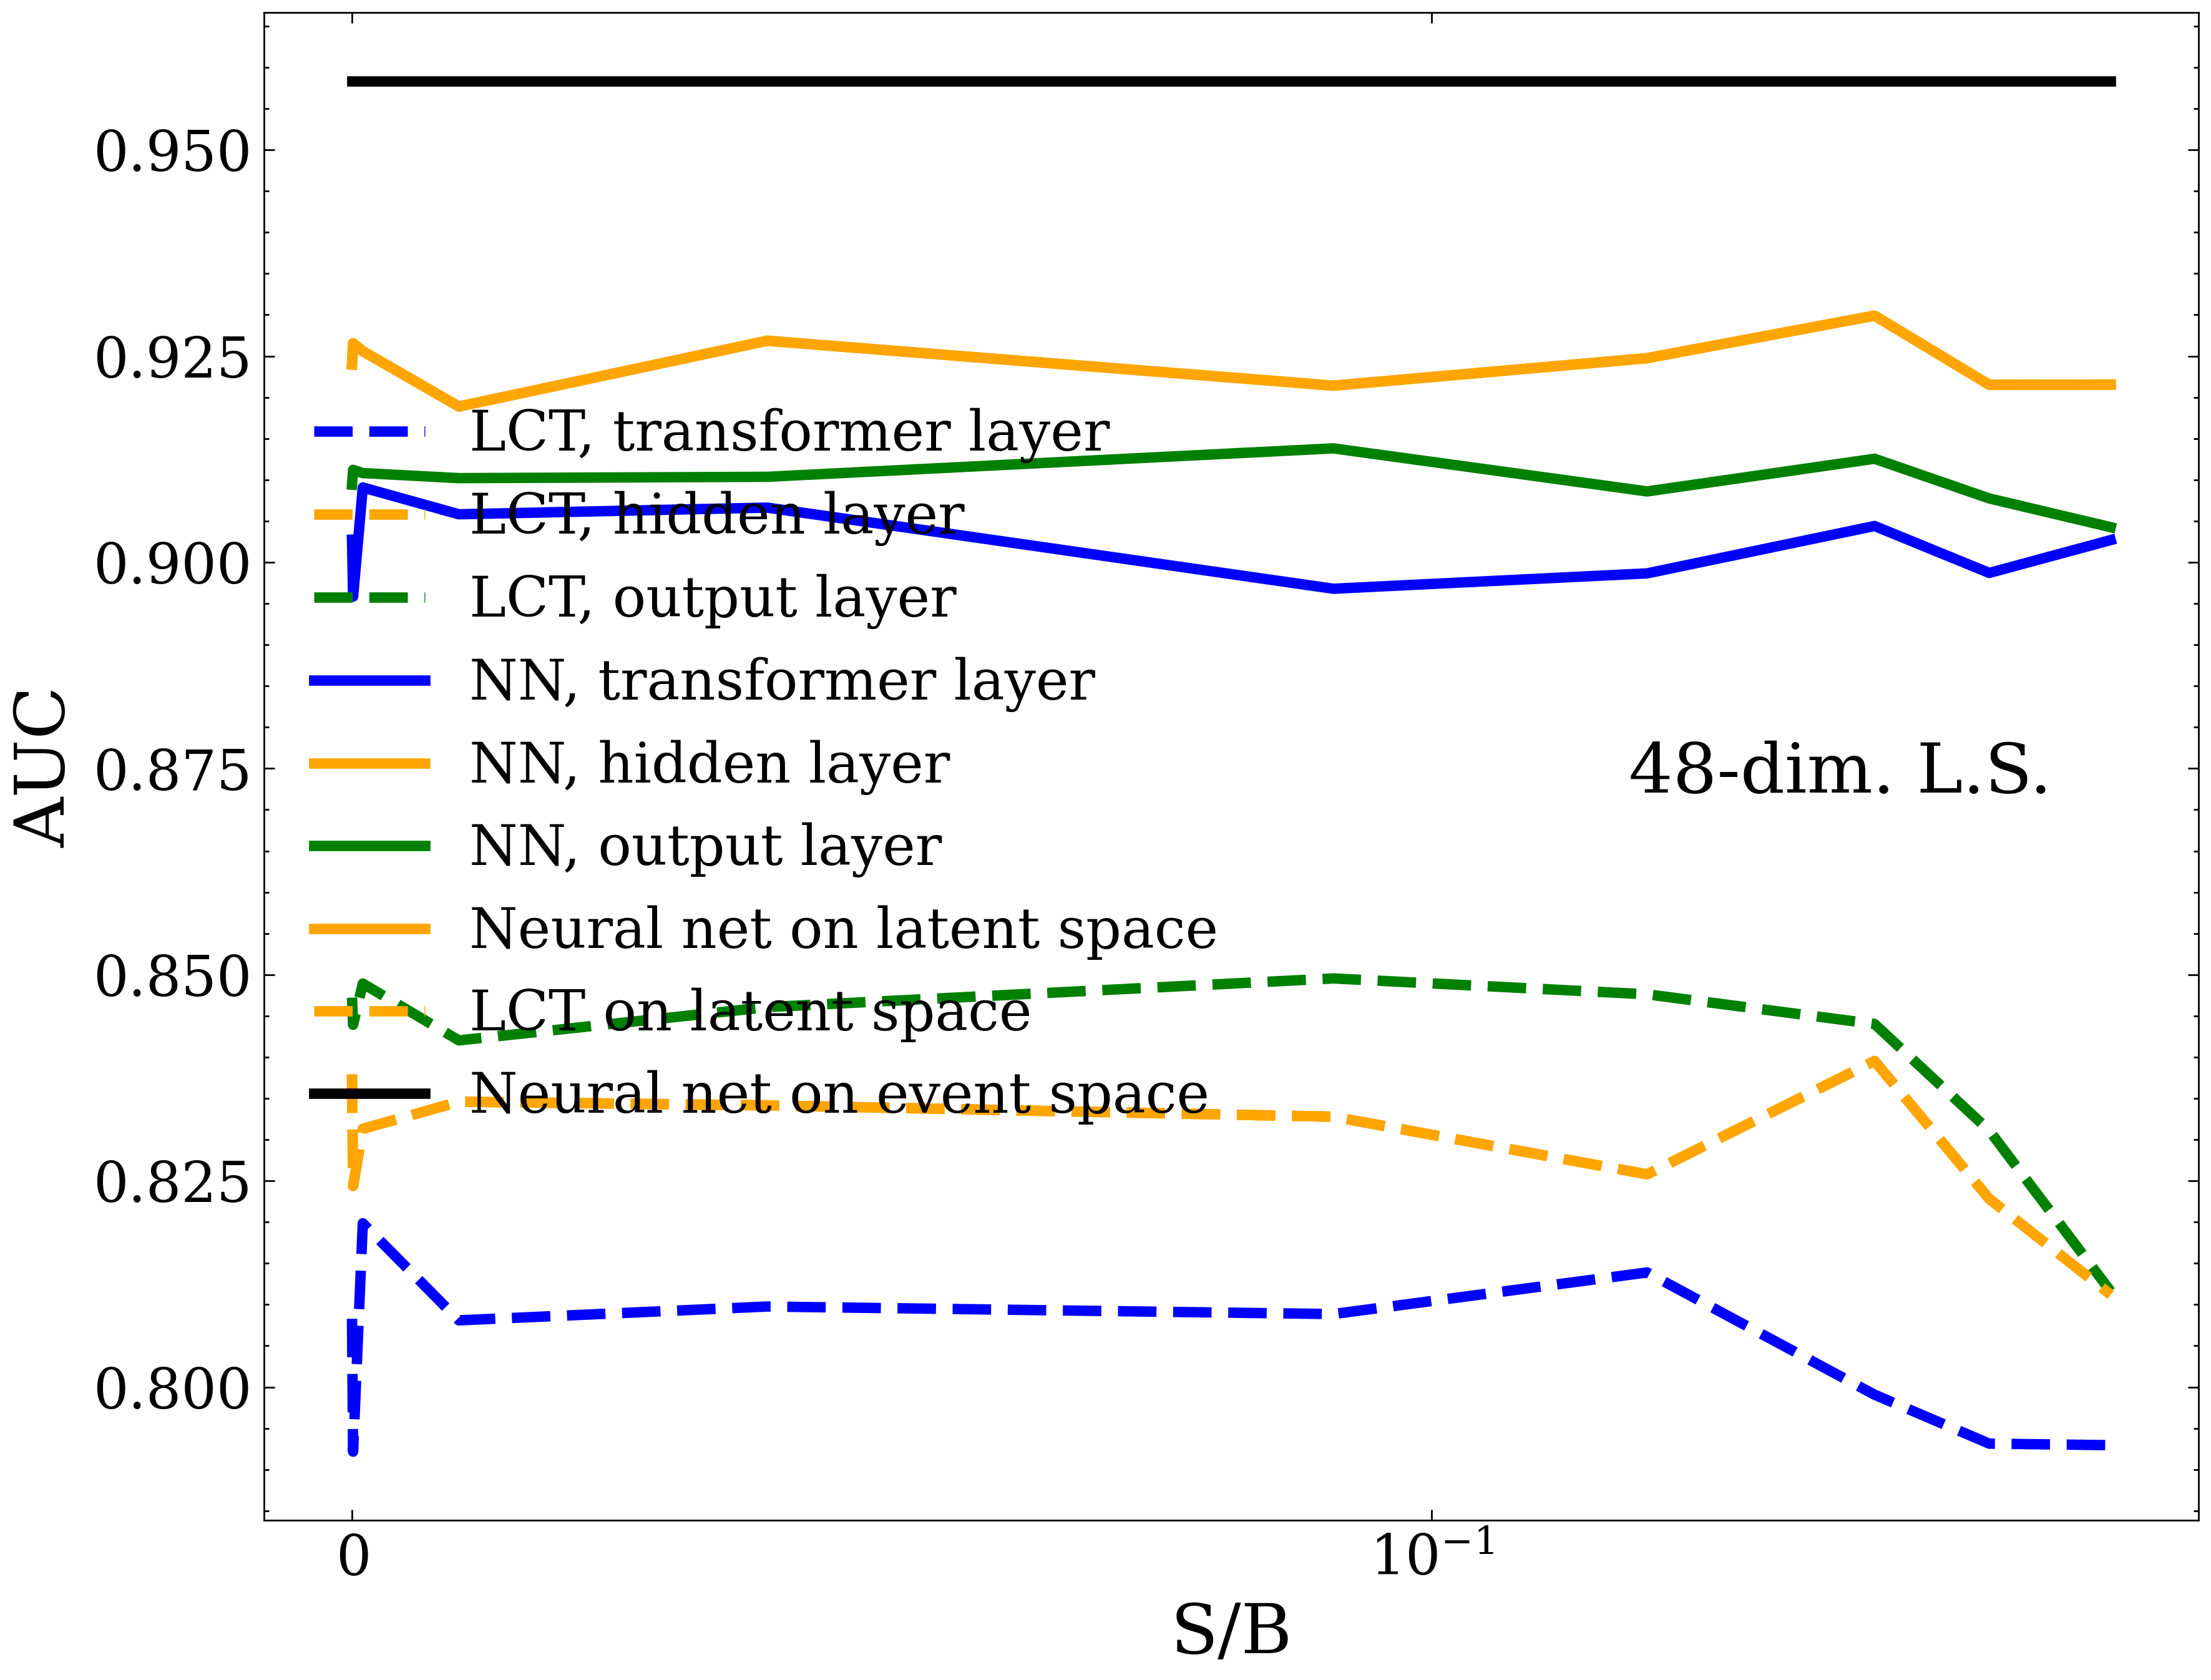

In [17]:
linthresh = 0.1

fig = plt.figure(figsize = (10,8))

l = 3 

# All transformer layers
"""
plt.plot(exp_id_SB_ratios, lct_auc_dict[0], label = "LCT, transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT, hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[2], label = "LCT, output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_auc_dict[0], label = "NN, transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "NN, hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[2], label = "NN, output layer", color = "green", linewidth = l)
"""

# One transformer layer
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "Neural net on latent space", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT on latent space", linewidth = l, color = "orange", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_const_rep_auc, label = "Neural net on event space", color = "black", linewidth = l)

    
plt.xscale("symlog", linthresh=linthresh)
plt.xlabel("S/B")
plt.ylabel("AUC")
plt.legend(loc = "center left")
plt.text(0.4, 0.25, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=20,verticalalignment="top")
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



### Plot max(SIC) vs training epoch

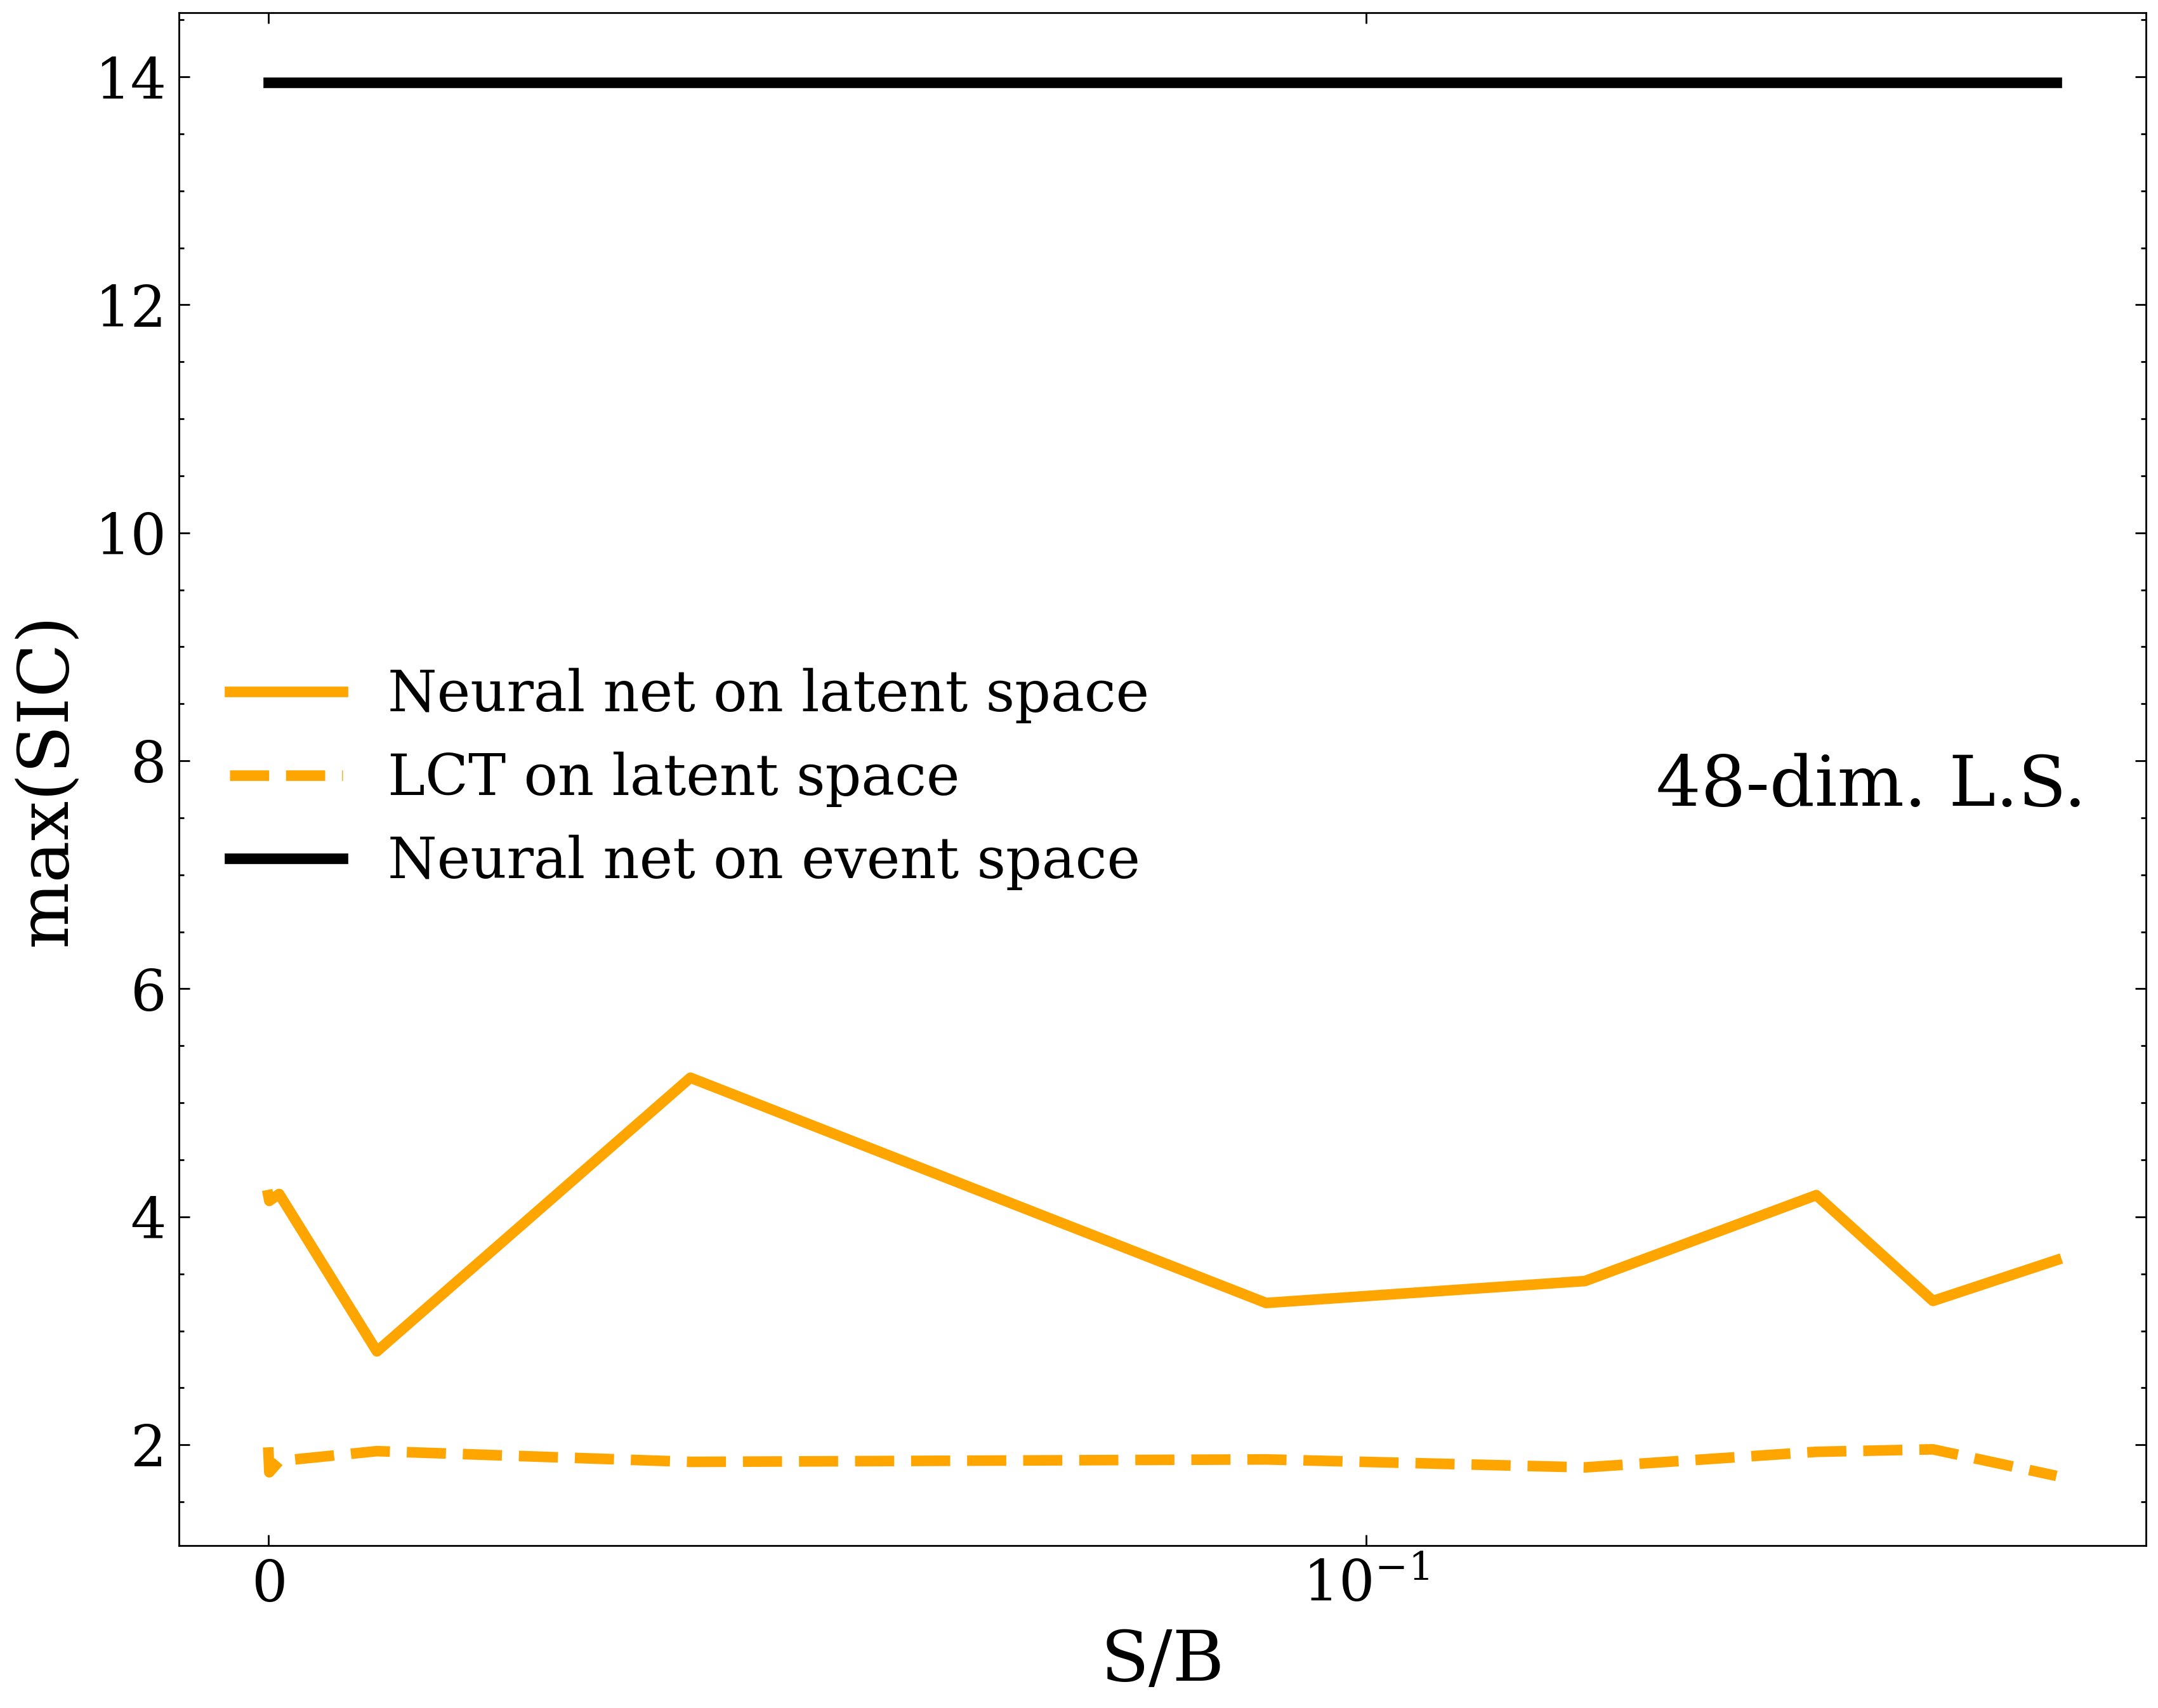

In [18]:
fig = plt.figure(figsize = (10,8))

l = 3

# All transformer layers
"""
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[0], label = "LCT, transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT, hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[2], label = "LCT, output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_maxsic_dict[0], label = "NN, transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "NN, hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[2], label = "NN, output layer", color = "green", linewidth = l)
"""

# One transformer layers
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "Neural net on latent space", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT on latent space", linewidth = l, color = "orange", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_const_rep_maxsic, label = "Neural net on event space", color = "black", linewidth = l)

    
plt.xscale("symlog", linthresh=linthresh)
plt.xlabel("S/B")
plt.ylabel("max(SIC)")
plt.legend(loc = "center left")
plt.text(0.4, 0.25, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=20,verticalalignment="top")

plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



### Plot FPR @ TPR = 0.5 vs training epoch

In [ ]:
fig = plt.figure(figsize = (10,8))

l = 3

# All transformer layers
"""
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[0], label = "LCT, transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[1], label = "LCT, hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[2], label = "LCT, output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[0], label = "NN, transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[1], label = "NN, hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[2], label = "NN, output layer", color = "green", linewidth = l)
"""

# One transformer layers
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[1], label = "Neural net on latent space", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[1], label = "LCT on latent space", linewidth = l, color = "orange", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_const_rep_FPRatTPR, label = "Neural net on event space", color = "black", linewidth = l)

    
plt.xscale("symlog", linthresh=linthresh)
plt.xlabel("S/B")
plt.ylabel("FPR @ TPR = 0.5")
plt.legend(loc = "center left")
plt.text(0.4, 0.25, str(dim)+"-dim. L.S.", transform=ax.transAxes, fontsize=20,verticalalignment="top")

plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()

